In [1]:
import sys
sys.path.insert(1, '../GBT_pipeline')
from synthetic import create_true, create_full_cadence, create_false, create_true_single_shot
import matplotlib.pyplot as plt
import numpy as np 
from single_search import search
from execute_model import model_load
import tensorflow as tf

In [13]:
NUM_SAMPLES = 10
factor =1

print("Loading in plate")
plate = np.load('../../filtered.npy')
print("Creating False")

false_data = create_full_cadence(create_false, plate = plate, samples = NUM_SAMPLES, snr_base=300, snr_range=10)
print("Creating True")

true_data = create_full_cadence(create_true, plate = plate, samples = NUM_SAMPLES, snr_base=300, snr_range=10, factor=factor)
print("Creating Single Shot True")

true_single_shot = create_full_cadence(create_true_single_shot, plate = plate, samples = NUM_SAMPLES, snr_base=300, snr_range=10,factor=factor)


Loading in plate
Creating False
Creating True
Creating Single Shot True


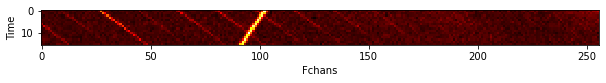

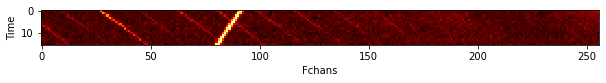

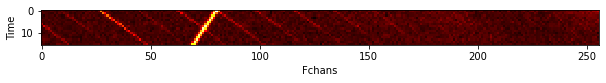

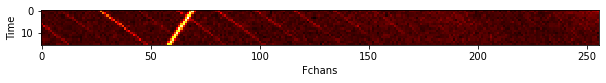

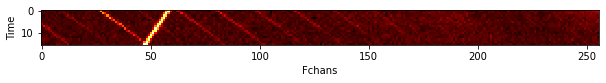

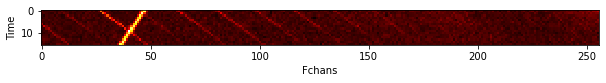

In [14]:
%matplotlib inline
import random 
for i in range(6):
    plt.figure(figsize=(10,4))
    plt.xlabel("Fchans")
    plt.ylabel("Time")
    plt.imshow(false_data[1,i,:,:], interpolation='nearest', cmap=plt.get_cmap('hot'))
    plt.show()

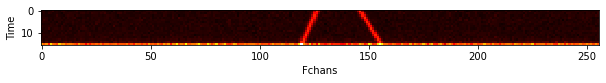

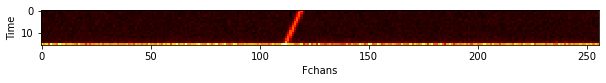

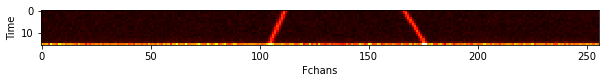

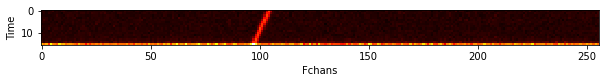

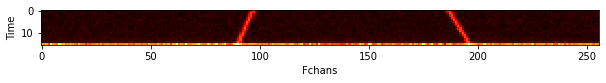

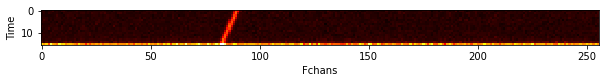

In [15]:
%matplotlib inline
import random 
for i in range(6):
    plt.figure(figsize=(10,4))
    plt.xlabel("Fchans")
    plt.ylabel("Time")
    plt.imshow(true_data[1,i,:,:], interpolation='nearest', cmap=plt.get_cmap('hot'))
    plt.show()

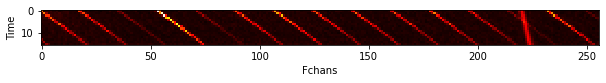

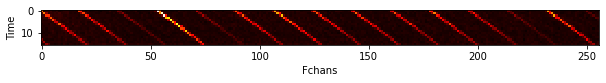

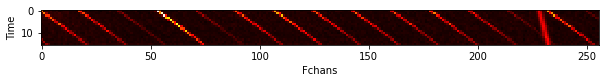

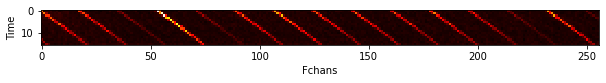

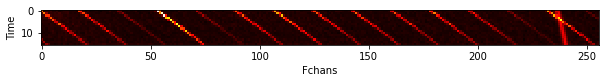

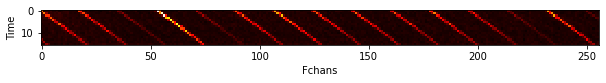

In [17]:
%matplotlib inline
import random 
for i in range(6):
    plt.figure(figsize=(10,4))
    plt.xlabel("Fchans")
    plt.ylabel("Time")
    plt.imshow(true_single_shot[1,i,:,:], interpolation='nearest', cmap=plt.get_cmap('hot'))
    plt.show()

In [ ]:
print("Load Model")

model = model_load("../../VAE-ENCODERv6.h5")

print("Search False")
search(false_data, model, False)

print("Search True")
search(true_data, model, True)

print("Search True Single Shot")
search(true_single_shot, model, True)